**Meaning of Data Columns**

- SD: Sus domain i.e. words associated to hacking
- JD: Job domain i.e. words associated with job portals
- CD: Cloud domain i.e. words associated with cloud drives

- WKE: user accessed during weekends
- OWH: user accessed out of work hours (of work days)
- WH: user accessed during work hours

**Import Feature Engineered Data**
- OCEAN Personality Test
- File
- HTTP

In [150]:
import pandas as pd
data = pd.read_parquet('../data/FEData_For_Modelling.parquet').reset_index(drop = True)
data

,user,O,C,E,A,N,FCwke,FCowh,FCwh,SDwke,SDowh,SDwh,CDwke,CDowh,CDwh,JDwke,JDowh,JDwh
0,AAB1302,38,41,10,38,28,23,37,142,0,1,10,0,0,0,40,81,246
1,AAB1762,32,39,18,18,33,0,194,654,0,9,14,0,0,4,0,243,679
2,AAC0904,31,30,36,18,28,0,0,0,0,22,144,0,5,34,0,499,4025
3,AAC1033,42,40,40,22,29,0,0,0,0,14,72,0,0,1,0,1,2
4,AAC1489,24,13,42,24,38,0,0,0,0,1,175,0,0,2,0,101,5058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ZRF1980,43,41,26,16,30,0,9,1272,0,16,298,0,0,11,0,28,494
1996,ZUR1449,31,42,12,36,17,0,0,0,0,1,7,0,65,296,0,293,1322
1997,ZVW1475,38,35,18,24,37,0,0,0,0,0,1,0,0,0,0,2,7
1998,ZWS0755,45,47,42,39,28,0,0,0,0,58,266,0,0,0,0,148,810


Get a list of malicious users from answers dataset
- Identified in scenario 2

In [151]:
import os
malicious_filenames = os.listdir('../data/answers')
malicious_users = []

for filename in malicious_filenames:
    malicious_users.append(filename.replace('r5.2-2-', "").replace('.csv', ""))

malicious_users

['MDS0680',
 'GWG0497',
 'CKP0630',
 'HMS1658',
 'BYO1846',
 'HXP0976',
 'CIF1430',
 'ITA0159',
 'OSS1463',
 'SNK1280',
 'HIS1394',
 'SIS0042',
 'HSN0675',
 'MCP0611',
 'TNB1616',
 'CHP1711',
 'MGB1235',
 'NAH1366',
 'JAL0811',
 'OKM1092',
 'TMT0851',
 'DCC1119',
 'KSS1005',
 'VCF1602',
 'RRS0056',
 'WDT1634',
 'ICB1354',
 'ZIE0741',
 'LVF1626',
 'TRC1838']

**Add 'malicous column' to identify such users**
- 1: malicous
- 2: not malicious

In [152]:
import numpy as np

data['malicious'] = np.where(data['user'].isin(malicious_users), 1, 0)
data

,user,O,C,E,A,N,FCwke,FCowh,FCwh,SDwke,SDowh,SDwh,CDwke,CDowh,CDwh,JDwke,JDowh,JDwh,malicious
0,AAB1302,38,41,10,38,28,23,37,142,0,1,10,0,0,0,40,81,246,0
1,AAB1762,32,39,18,18,33,0,194,654,0,9,14,0,0,4,0,243,679,0
2,AAC0904,31,30,36,18,28,0,0,0,0,22,144,0,5,34,0,499,4025,0
3,AAC1033,42,40,40,22,29,0,0,0,0,14,72,0,0,1,0,1,2,0
4,AAC1489,24,13,42,24,38,0,0,0,0,1,175,0,0,2,0,101,5058,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ZRF1980,43,41,26,16,30,0,9,1272,0,16,298,0,0,11,0,28,494,0
1996,ZUR1449,31,42,12,36,17,0,0,0,0,1,7,0,65,296,0,293,1322,0
1997,ZVW1475,38,35,18,24,37,0,0,0,0,0,1,0,0,0,0,2,7,0
1998,ZWS0755,45,47,42,39,28,0,0,0,0,58,266,0,0,0,0,148,810,0


In [44]:
data[data.user == 'TRC1838']

,user,O,C,E,A,N,FCwke,FCowh,FCwh,SDwke,SDowh,SDwh,CDwke,CDowh,CDwh,JDwke,JDowh,JDwh,malicious
1820,TRC1838,17,30,42,30,23,0,0,165,0,0,58,0,0,12,0,0,757,1


# Decision Tree / Random Forest

In [153]:
from sklearn.model_selection import train_test_split
from collections import Counter

X = data.drop(columns = ['user', 'malicious'])
y = data.malicious

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train Labels before Resampling")
print(Counter(y_train))

Train Labels before Resampling
Counter({0: 1574, 1: 26})


**SMOTE Oversampling**
- Not included for now

In [105]:
# from imblearn.over_sampling import SMOTE

# # transform the dataset
# oversample = SMOTE(sampling_strategy=0.5) #sampling_strategy=0.8
# resampled_X_train, resampled_y_train = oversample.fit_resample(X_train, y_train)

# print("Train Labels after Resampling")
# print(Counter(resampled_y_train))

Train Labels after Resampling
Counter({0: 1574, 1: 787})


**Feature Normalisation**

In [154]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



**Recursive Feature Elimination + Cross Validation**
- removed for standardisation

In [70]:
# from sklearn.feature_selection import RFECV

# # Feature Selection
# rfe = RFECV(estimator = dt, scoring = 'precision') #minimises false positives
# X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
# X_test_rfe = rfe.transform(X_test_scaled)

# print('Chosen best features by rfe:', X_train.columns[rfe.support_].tolist())
# print('Ranking of Feature Importance:', rfe.ranking_)



**Model Evaluation**

Accuracy: 98.25%

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       396
           1       0.20      0.25      0.22         4

    accuracy                           0.98       400
   macro avg       0.60      0.62      0.61       400
weighted avg       0.98      0.98      0.98       400



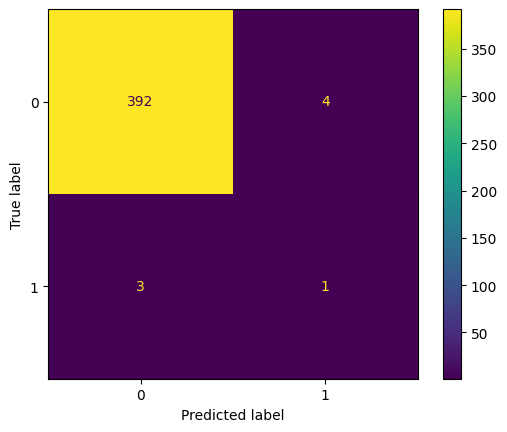

In [155]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)

# Evaluate the model
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
disp.plot()
plt.show()

**Hyperparameter Tuning**

In [156]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    # 'criterion': ['gini', 'entropy', 'log_loss'], gini
    # 'splitter': ['best', 'random'], best
    'max_features': ['sqrt', 'log2'],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2], 0
    'max_leaf_nodes': [None, 5, 10],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2], 0
    'class_weight': [None, 'balanced'],
    'ccp_alpha': [0.0, 0.1, 0.2]
}

# Perform GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(dt, param_grid, cv=10)
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_dt = grid_search.best_estimator_
test_score = best_dt.score(X_test_scaled, y_test)
print("Test Set Score:", test_score)


Best Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Score: 0.9843749999999998
Test Set Score: 0.99


**Model Evaluation after Tuning**

Accuracy: 99.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       396
           1       0.00      0.00      0.00         4

    accuracy                           0.99       400
   macro avg       0.49      0.50      0.50       400
weighted avg       0.98      0.99      0.99       400



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

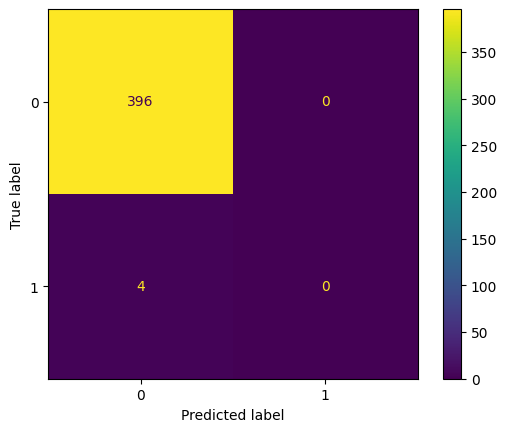

In [157]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate the model
best_dt.fit(X_train_scaled, y_train)
y_pred = best_dt.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
disp.plot()
plt.show()

**Visualise Graph**

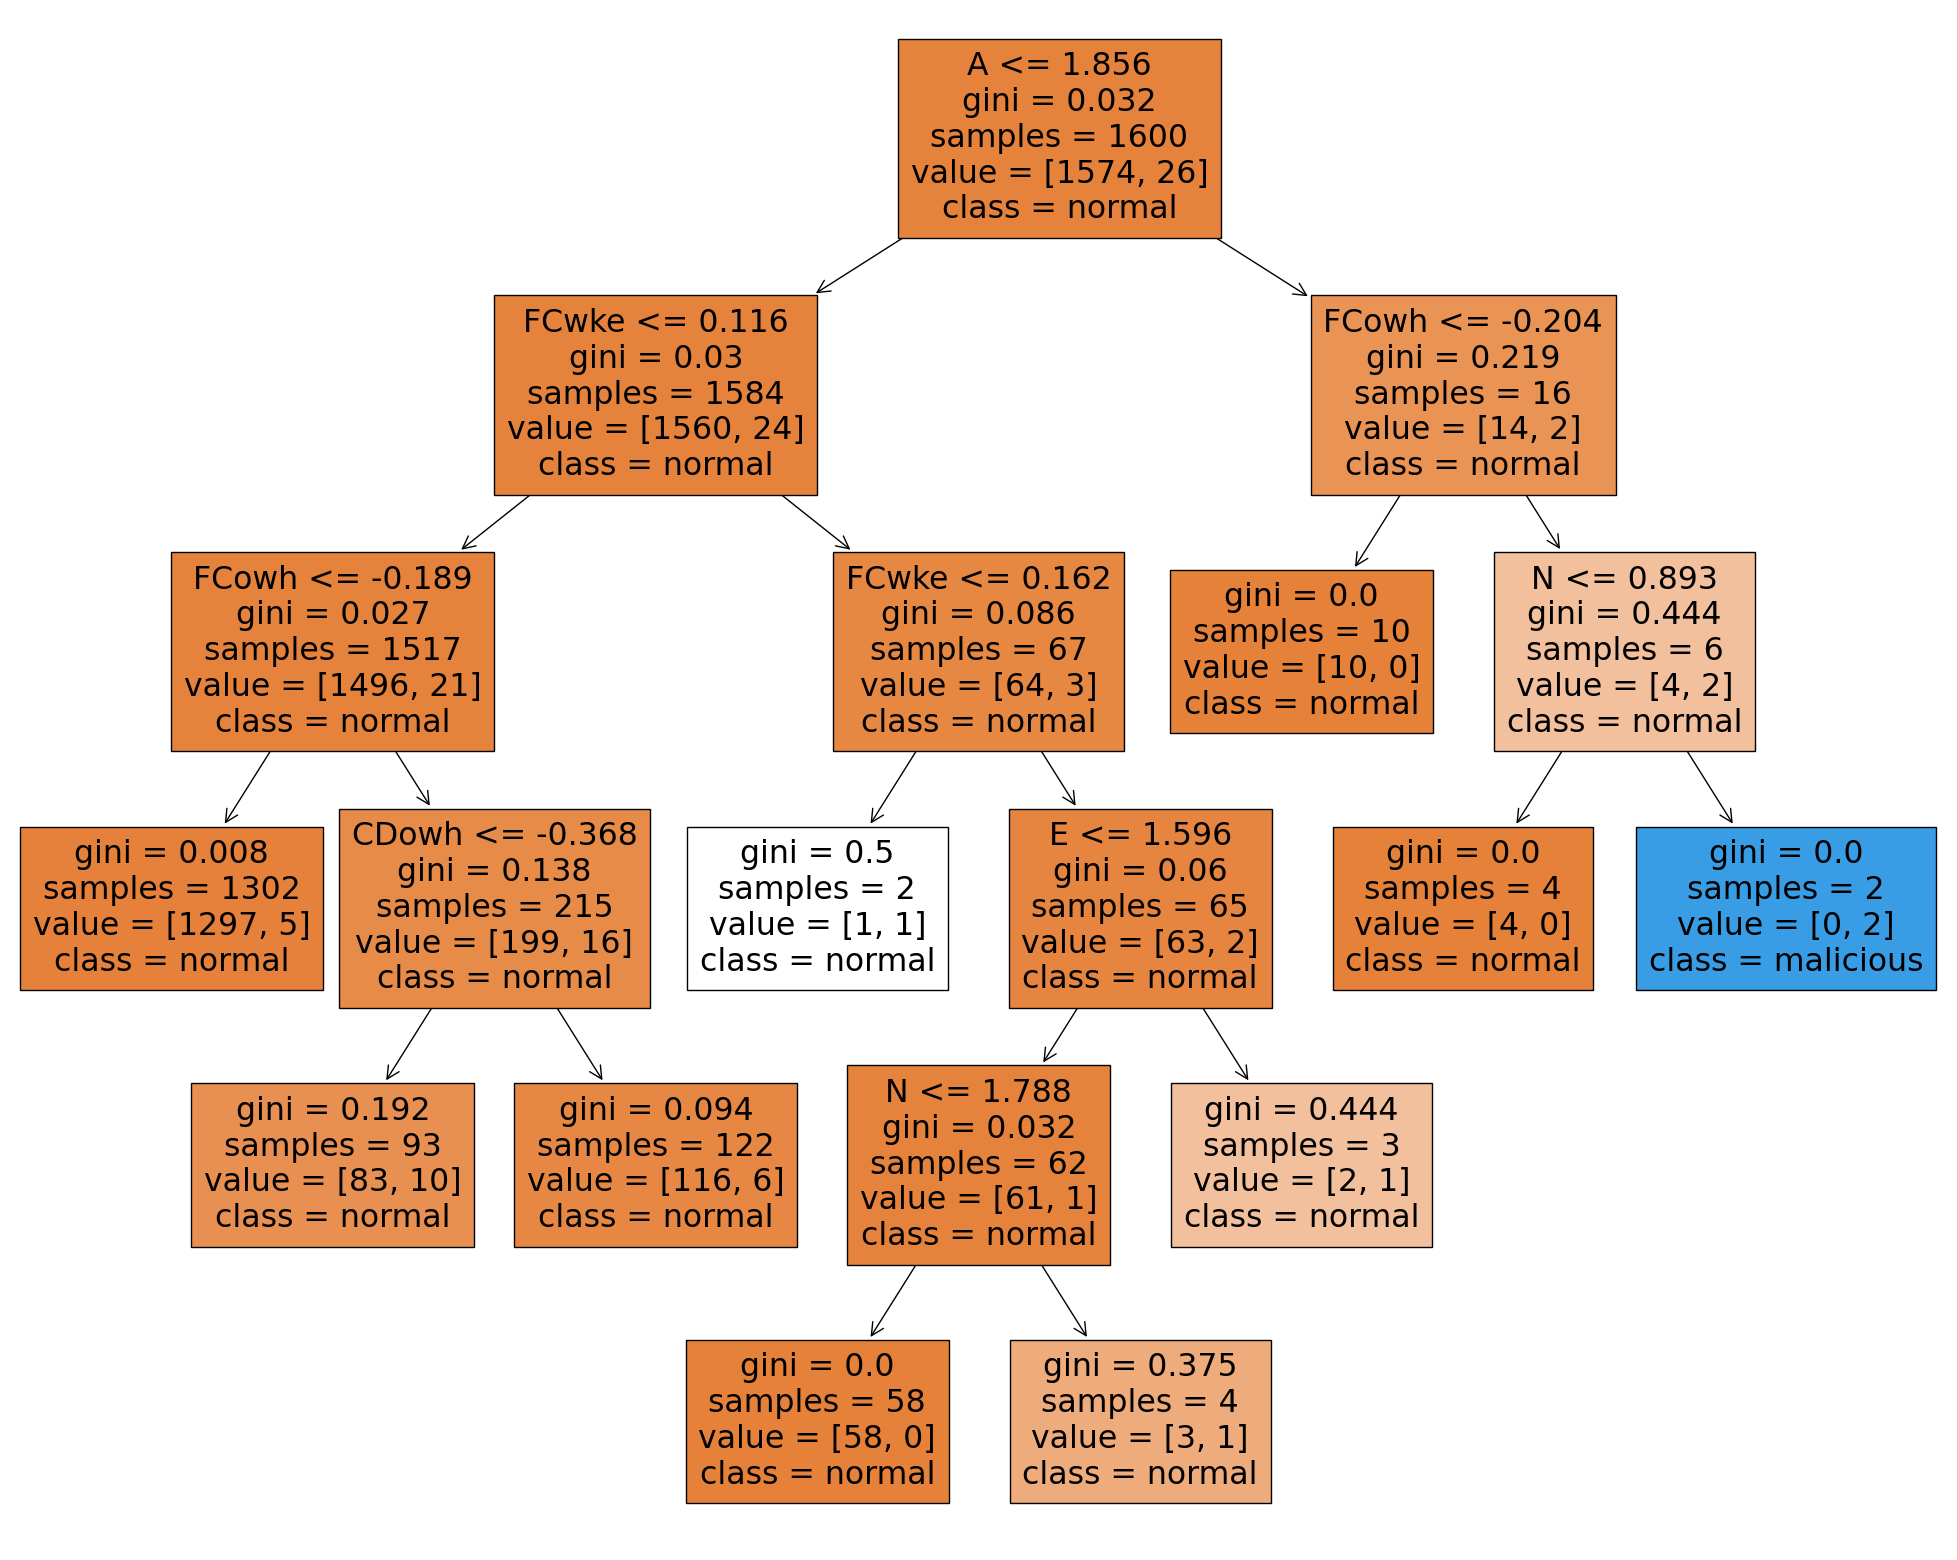

In [158]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_dt, 
                   feature_names=X_train.columns.tolist(),  
                   class_names=["normal","malicious"],
                   filled=True)

**Feature Importance**

<Axes: >

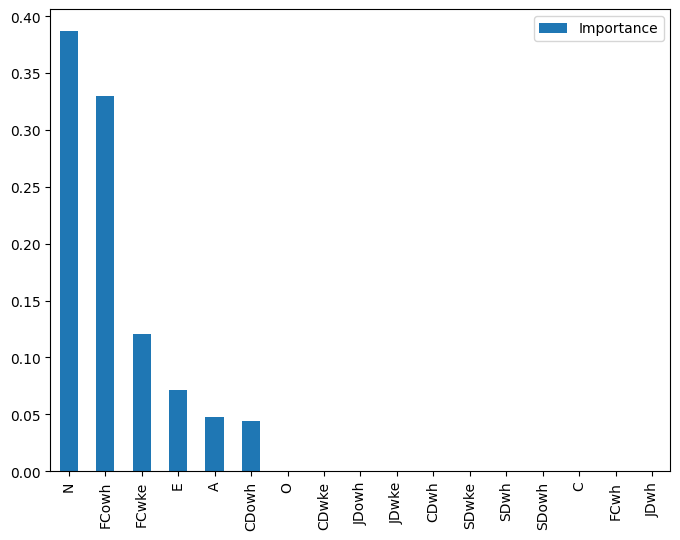

In [159]:
feat_importances = pd.DataFrame(best_dt.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

**Calculate Risk Score**
- A higher impurity indicates a higher risk or uncertainty in the classification decision made by that node.

Get user id whose predictions were FP / FN / TN

In [160]:
X_test_indices = np.where(y_pred != y_test)[0]
data_indices = X_test.iloc[X_test_indices].index
FN_data = data.iloc[data_indices]
FN_data

,user,O,C,E,A,N,FCwke,FCowh,FCwh,SDwke,SDowh,SDwh,CDwke,CDowh,CDwh,JDwke,JDowh,JDwh,malicious
1473,OKM1092,11,34,38,15,27,0,105,244,0,0,0,0,1,8,0,108,232,1
1813,TNB1616,33,38,10,43,29,0,12,61,0,206,605,0,9,15,0,123,248,1
1274,MCP0611,19,19,19,45,29,0,5,226,0,1,19,0,0,0,0,55,58,1
1810,TMT0851,39,39,16,25,25,0,35,77,0,8,20,0,488,1491,0,311,816,1


In [147]:
node_indicator = best_dt.decision_path(X_test.iloc[X_test_indices])
decision_path = node_indicator.toarray()
print(decision_path)
# Print the decision path
print("Decision path for sample {}: {}".format(0, np.where(decision_path[0] == 1)[0]))

[[1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]]
Decision path for sample 0: [0 2 4 6]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [174]:
clf = best_dt

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

The binary tree structure has 19 nodes and has the following tree structure:

node=0 is a split node with value=[[0.98375 0.01625]]: go to node 1 if X[:, 3] <= 1.8558970093727112 else to node 2.
	node=1 is a split node with value=[[0.98484848 0.01515152]]: go to node 7 if X[:, 5] <= 0.11585097014904022 else to node 8.
	node=2 is a split node with value=[[0.875 0.125]]: go to node 3 if X[:, 6] <= -0.20409495383501053 else to node 4.
		node=3 is a leaf node with value=[[1. 0.]].
		node=4 is a split node with value=[[0.66666667 0.33333333]]: go to node 5 if X[:, 4] <= 0.8930180370807648 else to node 6.
			node=5 is a leaf node with value=[[1. 0.]].
			node=6 is a leaf node with value=[[0. 1.]].
		node=7 is a split node with value=[[0.98615689 0.01384311]]: go to node 9 if X[:, 6] <= -0.18866170942783356 else to node 10.
		node=8 is a split node with value=[[0.95522388 0.04477612]]: go to node 11 if X[:, 5] <= 0.16219599545001984 else to node 12.
			node=9 is a leaf node with value=[[0.996

In [133]:
best_dt.predict_proba(X_test_scaled[X_test_indices])


array([[0.95081967, 0.04918033],
       [0.95081967, 0.04918033],
       [0.99615975, 0.00384025],
       [0.95081967, 0.04918033]])

# Note: Libraries to be Installed

In [56]:
# %pip install scikit-learn
# %pip install matplotlib
# %pip install imblearn - depends on whether used
# %pip install pydotplus
